# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [2]:
import pandas as pd

In [3]:
# load the data from two csv files, separately
df_act = pd.read_csv('./act.csv',index_col=0)
df_sat = pd.read_csv('./sat.csv',index_col=0)

##### 2. Print the first ten rows of each dataframe.

In [4]:
df_act.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
df_sat.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

In [6]:
# State - if "National" it means all the country, if name of state - this state only
# Participation - percent of students that took this kind of test
# All other columns except "Total" and "Composite" - names of subjects
# Total - sum of all the subjects of this test (SAT)
# Composite - mean of all the subjects of this test (ACT)

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [7]:
# 1. There has to be not only percent but whole number of students
# 2. Moreover there are two outliers, and we are going to replace them
# 3. I wish we had distribution of grades into each state, for instance how many students in state got over 25,
# how many over 20 but less than 25 etc.

In [8]:
# to find outliers let's sort values of ACT by Science
df_act.sort_values(['Science']).head()
# we can see that we have one oulier here, Science = 23

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6
29,Nevada,100%,16.3,18.0,18.1,18.2,17.8
25,Mississippi,100%,18.2,18.1,18.8,18.8,18.6
41,South Carolina,100%,17.5,18.6,19.1,18.9,18.7
34,North Carolina,100%,17.8,19.3,19.6,19.3,19.1


In [9]:
# replace them with correct data from https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows
df_act.loc[21,'Science'] = 23.2

In [10]:
# sort values of SAT by Math, we know that there is a mistaken value
df_sat.sort_values(['Math']).head()
# we can see that we have one oulier here, Math = 52

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060
8,District of Columbia,100%,482,468,950
7,Delaware,100%,503,492,996
12,Idaho,93%,513,493,1005
22,Michigan,100%,509,495,1005


In [11]:
# replace them with correct data from https://blog.prepscholar.com/average-sat-scores-by-state-most-recent
df_sat.loc[20,'Math'] = 524

In [12]:
df_act['Total']=df_act['English']+df_act['Math']+df_act['Reading']+df_act['Science']

##### 5. Print the types of each column.

In [12]:
df_act.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
Total            float64
dtype: object

In [13]:
df_sat.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [14]:
# create numeric for participation from string with %
df_act['Participation'] = df_act['Participation'].str[:-1]
df_act['Participation'] = pd.to_numeric(df_act['Participation'])

In [15]:
# create numeric for participation from string with %
df_sat['Participation'] = df_sat['Participation'].str[:-1]
df_sat['Participation'] = pd.to_numeric(df_sat['Participation'])

In [16]:
df_act.head()

,State,Participation,English,Math,Reading,Science,Composite,Total
0,National,60,20.3,20.7,21.4,21.0,21.0,83.4
1,Alabama,100,18.9,18.4,19.7,19.4,19.2,76.4
2,Alaska,65,18.7,19.8,20.4,19.9,19.8,78.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7,78.3
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4,77.1


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [17]:
dict_sat_rw = {}
dict_sat_math = {}
dict_sat_total = {}

for i in df_sat.values:
    dict_sat_rw[i[0]]=i[2]
    dict_sat_math[i[0]]=i[3]
    dict_sat_total[i[0]]=i[4]
    
dict_act_english = {}
dict_act_math = {}
dict_act_reading = {}
dict_act_science = {}
dict_act_composit = {}

for i in df_act.values:
    dict_act_english[i[0]] = i[2]
    dict_act_math[i[0]] = i[3]
    dict_act_reading[i[0]] = i[4]
    dict_act_science[i[0]] = i[5]
    dict_act_composit[i[0]] = i[6]    

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [18]:
dict_sat = df_sat.to_dict()
dict_act = df_act.to_dict()   

##### 9. Merge the dataframes on the state column.

In [19]:
df_total = pd.merge(df_act,df_sat,on='State')
df_total.head()

,State,Participation_x,English,Math_x,Reading,Science,Composite,Total_x,Participation_y,Evidence-Based Reading and Writing,Math_y,Total_y
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,76.4,5,593,572,1165
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,78.8,38,547,533,1080
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,78.3,30,563,553,1116
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,77.1,3,614,594,1208
4,California,31,22.5,22.7,23.1,22.2,22.8,90.5,53,531,524,1055


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [20]:
df_total.rename(index=str, inplace=True, columns={'Participation_x':'Participation_ACT',
                                    'English':'English_ACT',
                                    'Math_x':'Math_ACT',
                                    'Reading':'Reading_ACT',
                                    'Science':'Science_ACT',
                                    'Composite':'Composite_ACT',
                                    'Total_x':'Total_ACT',              
                                    'Participation_y':'Participation_SAT',
                                    'Evidence-Based Reading and Writing':'EBRW_SAT',
                                    'Math_y':'Math_SAT',
                                    'Total_y':'Total_SAT'
                                       })
df_total.head()


,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Total_ACT,Participation_SAT,EBRW_SAT,Math_SAT,Total_SAT
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,76.4,5,593,572,1165
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,78.8,38,547,533,1080
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,78.3,30,563,553,1116
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,77.1,3,614,594,1208
4,California,31,22.5,22.7,23.1,22.2,22.8,90.5,53,531,524,1055


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [21]:
for i in df_total.columns:
    if df_total.dtypes[i]=='int64' or df_total.dtypes[i]=='float64':
        print("{}: min {}, max {}".format(i,min(df_total[i]),max(df_total[i])))
# Now we can see that there is no ouliers more

Participation_ACT: min 8, max 100
English_ACT: min 16.3, max 25.5
Math_ACT: min 18.0, max 25.3
Reading_ACT: min 18.1, max 26.0
Science_ACT: min 18.2, max 24.9
Composite_ACT: min 17.8, max 25.5
Total_ACT: min 70.6, max 101.4
Participation_SAT: min 2, max 100
EBRW_SAT: min 482, max 644
Math_SAT: min 468, max 651
Total_SAT: min 950, max 1295


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [22]:
import numpy as np
# function
def my_sd(data):
    return np.sqrt(np.mean([(x-data.mean())**2 for x in data]))       

In [23]:
# using of function
sd = []
for i in df_total.columns:
    if df_total.dtypes[i]=='int64' or df_total.dtypes[i]=='float64':
        sd.append(my_sd(df_total[i]))
sd  

[31.824175751231806,
 2.3304876369363368,
 1.9624620273436781,
 2.046902931484265,
 1.7222161451443672,
 2.0007860815819893,
 8.00451621850747,
 34.929070766645076,
 45.21697020437866,
 46.65713364485504,
 91.58351056778743]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [24]:
df_sd = {'State':'Standart deviation'}
sd = []
for i in df_total.columns:
    if df_total.dtypes[i]=='int64' or df_total.dtypes[i]=='float64':
        df_sd[i]=[my_sd(df_total[i])]
df_sd        

{'State': 'Standart deviation',
 'Participation_ACT': [31.824175751231806],
 'English_ACT': [2.3304876369363368],
 'Math_ACT': [1.9624620273436781],
 'Reading_ACT': [2.046902931484265],
 'Science_ACT': [1.7222161451443672],
 'Composite_ACT': [2.0007860815819893],
 'Total_ACT': [8.00451621850747],
 'Participation_SAT': [34.929070766645076],
 'EBRW_SAT': [45.21697020437866],
 'Math_SAT': [46.65713364485504],
 'Total_SAT': [91.58351056778743]}

In [25]:
#pd.DataFrame(new_df)
df_total = df_total.append(pd.DataFrame(df_sd), ignore_index=True)

In [26]:
df_total.tail()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Total_ACT,Participation_SAT,EBRW_SAT,Math_SAT,Total_SAT
47,Washington,29.000000,20.900000,21.900000,22.100000,22.000000,21.900000,86.900000,64.000000,541.00000,534.000000,1075.000000
48,West Virginia,69.000000,20.000000,19.400000,21.200000,20.500000,20.400000,81.100000,14.000000,558.00000,528.000000,1086.000000
49,Wisconsin,100.000000,19.700000,20.400000,20.600000,20.900000,20.500000,81.600000,3.000000,642.00000,649.000000,1291.000000
50,Wyoming,100.000000,19.400000,19.800000,20.800000,20.600000,20.200000,80.600000,3.000000,626.00000,604.000000,1230.000000
51,Standart deviation,31.824176,2.330488,1.962462,2.046903,1.722216,2.000786,8.004516,34.929071,45.21697,46.657134,91.583511


In [27]:
# delete this new string, it's getting all the data worse and makes no sence
df_total.drop(51,inplace=True)

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [28]:
# sorting by participation
df_total.sort_values(['Participation_ACT'],inplace=True)
df_total.head()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Total_ACT,Participation_SAT,EBRW_SAT,Math_SAT,Total_SAT
19,Maine,8.0,24.2,24.0,24.8,23.7,24.3,96.7,95.0,513.0,499.0,1012.0
29,New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,101.4,96.0,532.0,520.0,1052.0
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,95.9,100.0,503.0,492.0,996.0
39,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,95.4,71.0,539.0,524.0,1062.0
38,Pennsylvania,23.0,23.4,23.4,24.2,23.3,23.7,94.3,65.0,540.0,531.0,1071.0


In [29]:
# sorting by index
df_total.sort_index(inplace = True)
df_total.head()

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Total_ACT,Participation_SAT,EBRW_SAT,Math_SAT,Total_SAT
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,76.4,5.0,593.0,572.0,1165.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,78.8,38.0,547.0,533.0,1080.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,78.3,30.0,563.0,553.0,1116.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,77.1,3.0,614.0,594.0,1208.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,90.5,53.0,531.0,524.0,1055.0


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [30]:
# filtering by participation and Math (ACT)
df_total[(df_total['Participation_ACT']>50)&(df_total['Math_ACT']>21)]

,State,Participation_ACT,English_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT,Total_ACT,Participation_SAT,EBRW_SAT,Math_SAT,Total_SAT
13,Illinois,93.0,21.0,21.2,21.6,21.3,21.4,85.1,9.0,559.0,556.0,1115.0
15,Iowa,67.0,21.2,21.3,22.6,22.1,21.9,87.2,2.0,641.0,635.0,1275.0
16,Kansas,73.0,21.1,21.3,22.3,21.7,21.7,86.4,4.0,632.0,628.0,1260.0
23,Minnesota,100.0,20.4,21.5,21.8,21.6,21.5,85.3,3.0,644.0,651.0,1295.0
35,Ohio,75.0,21.2,21.6,22.5,22.0,22.0,87.3,12.0,578.0,570.0,1149.0
41,South Dakota,80.0,20.7,21.5,22.3,22.0,21.8,86.5,3.0,612.0,603.0,1216.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [31]:
import matplotlib.pyplot as plt

# plotting participation of ACT ant SAT
figure,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,7))
df_total['Participation_ACT'].plot(ax=ax[0],title="Participation, ACT",kind='hist')
df_total['Participation_SAT'].plot(ax=ax[1],title="Participation, SAT",kind='hist')

##### 17. Plot the Math(s) distributions from both data sets.

Text(0.5,1,'Math, comparing')

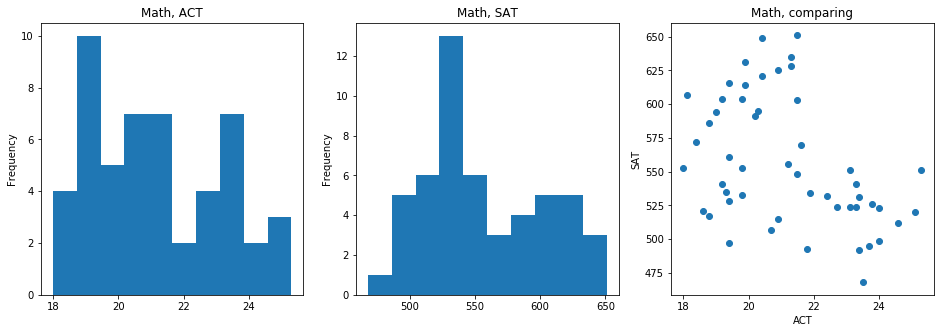

In [32]:
# plotting Math results
# we can see that there is no correlation between Math_ACT and Math_SAT
figure,ax = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
df_total['Math_ACT'].plot(ax=ax[0],title="Math, ACT",kind='hist')
df_total['Math_SAT'].plot(ax=ax[1],title="Math, SAT",kind='hist')
plt.scatter(df_total['Math_ACT'],df_total['Math_SAT'])
plt.ylabel('SAT')
plt.xlabel('ACT')
plt.title('Math, comparing')

##### 18. Plot the Verbal distributions from both data sets.

Text(0.5,1,'Reading, comparing')

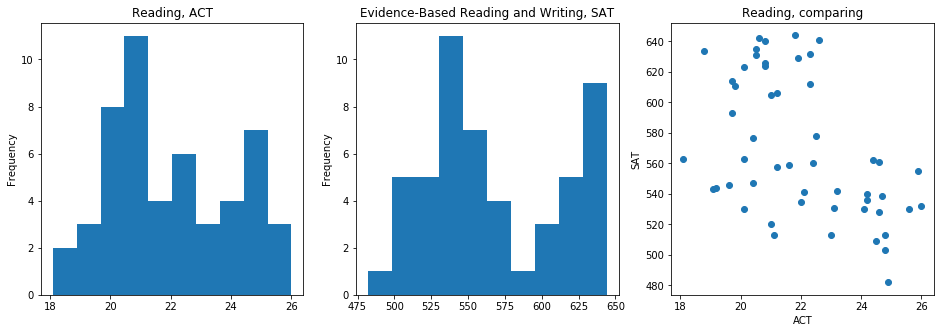

In [33]:
# plotting reading results
# we can see there is no correlation between these two values
figure,ax = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
df_total['Reading_ACT'].plot(ax=ax[0],title="Reading, ACT",kind='hist')
df_total['EBRW_SAT'].plot(ax=ax[1],title="Evidence-Based Reading and Writing, SAT",kind='hist')
plt.scatter(df_total['Reading_ACT'],df_total['EBRW_SAT'])
plt.ylabel('SAT')
plt.xlabel('ACT')
plt.title('Reading, comparing')

Text(0.5,1,'English, comparing')

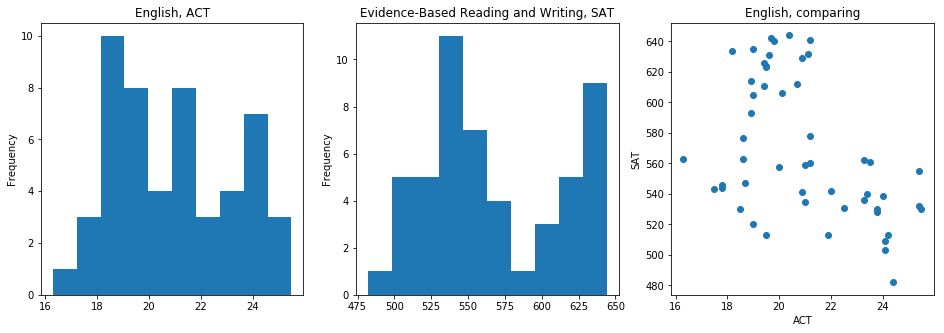

In [34]:
# plotting English and EBRW results
# we can see there is still no correlation between these two values
figure,ax = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
df_total['English_ACT'].plot(ax=ax[0],title="English, ACT",kind='hist')
df_total['EBRW_SAT'].plot(ax=ax[1],title="Evidence-Based Reading and Writing, SAT",kind='hist')
plt.scatter(df_total['English_ACT'],df_total['EBRW_SAT'])
plt.ylabel('SAT')
plt.xlabel('ACT')
plt.title('English, comparing')

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

In [35]:
# Normal distribution is the most common distribution for values lik IQ, for instance, as well as for grades

##### 20. Does this assumption hold true for any of our columns? Which?

In [36]:
# No one of our columns is normally distributed, graphics depict it, and we can prove it below.

##### 21. Plot some scatterplots examining relationships between all variables.

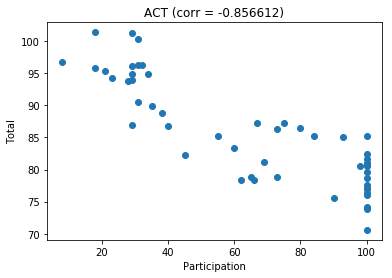

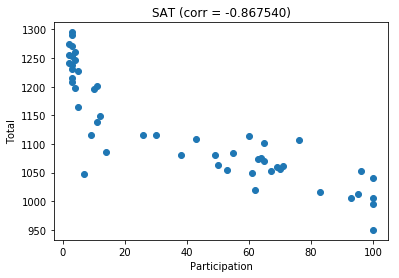

In [76]:
plt.scatter(df_act['Participation'],df_act['Total'])
plt.ylabel('Total')
plt.xlabel('Participation')
plt.title('ACT (corr = -0.856612)')
plt.show()

plt.scatter(df_sat['Participation'],df_sat['Total'])
plt.ylabel('Total')
plt.xlabel('Participation')
plt.title('SAT (corr = -0.867540)')
plt.show()

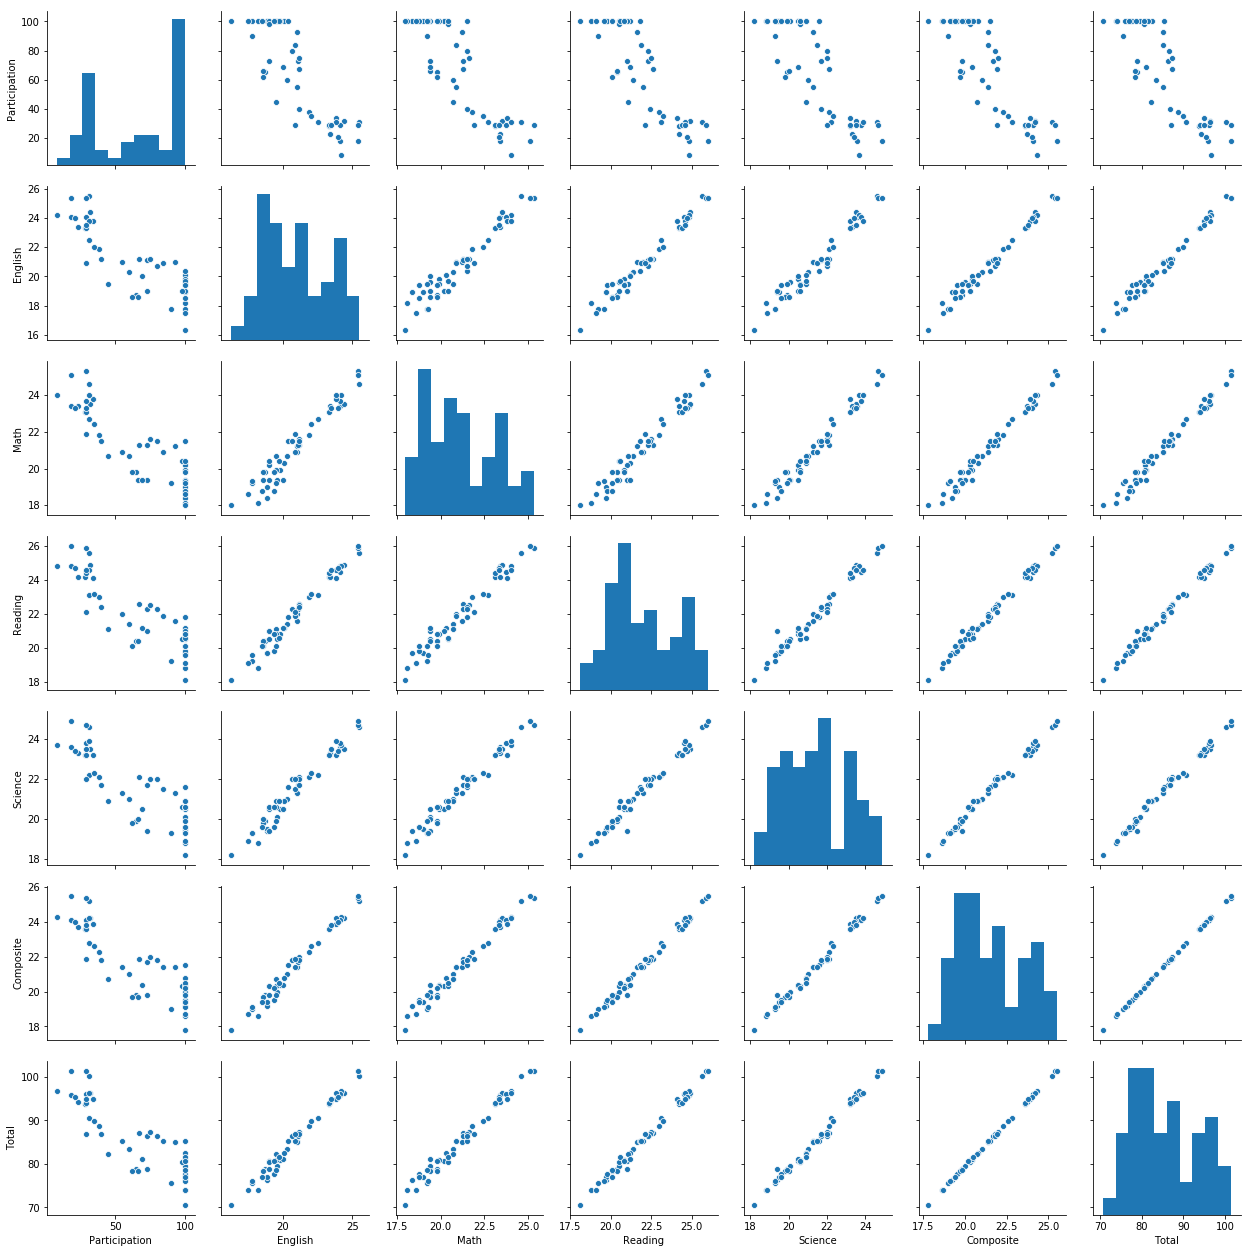

In [38]:
import seaborn as sns
# plotting relationships between ACT variables
sns.pairplot(data=df_act)

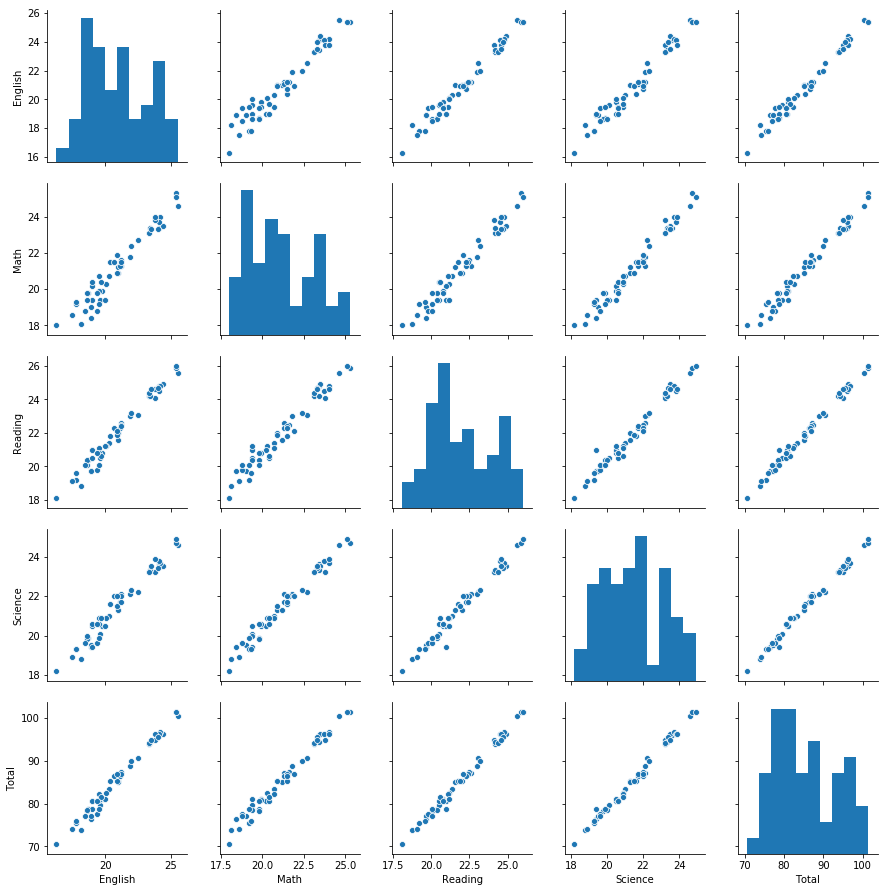

In [78]:
sns.pairplot(data=df_act[['English','Math','Reading','Science','Total']])

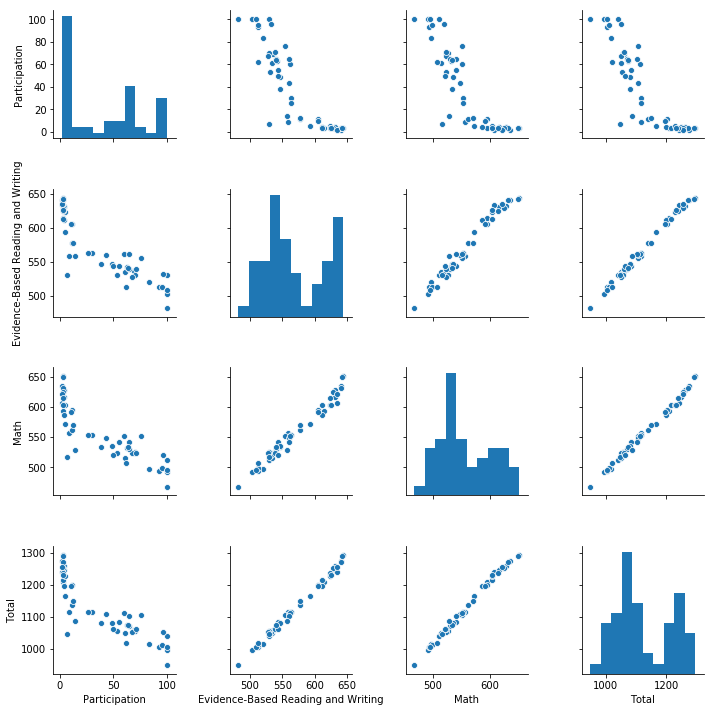

In [39]:
# plotting relationship between SAT variables
sns.pairplot(data=df_sat)

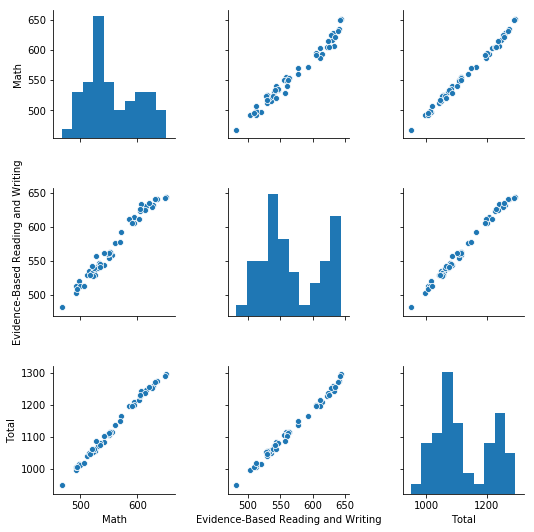

In [80]:
sns.pairplot(data=df_sat[['Math','Evidence-Based Reading and Writing','Total']])

##### 22. Are there any interesting relationships to note?

In [40]:
# 1. Average grades for all subjects (into SAT and ACT separately) are linearly dependent on each other
# 2. What is really interesting is that there is negative correlations between participation and average grade.
# Perhaps the reason is that only good students decided to pass an optional exam.
# I believe it is optional if it has low participation rate.

##### 23. Create box plots for each variable. 

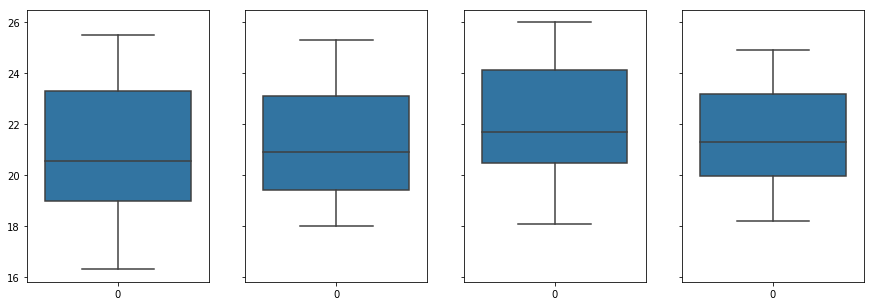

In [63]:
# creating box plots of average grades only, not for participation and composite
figure,ax = plt.subplots(1, 4, sharey=True, figsize=(15, 5))
for i,name in enumerate(df_act.columns[2:-2]):
    sns.boxplot(data=df_act[name],ax=ax[i])

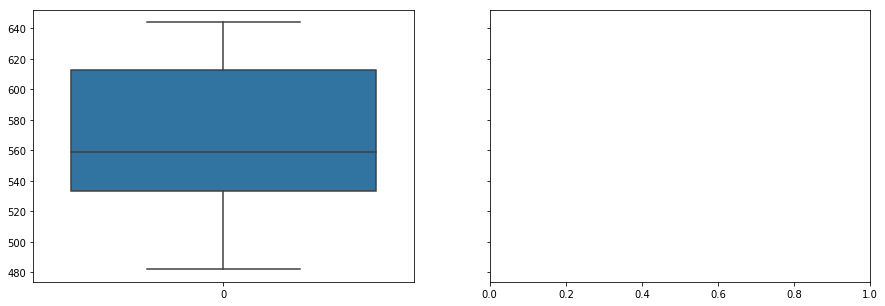

In [64]:
# creating box plots of average grades only, not for participation or composite and total grade
figure,ax = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
for i,name in enumerate(df_sat.columns[2:-2]):
    sns.boxplot(data=df_sat[name],ax=ax[i])

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

Total score https://public.tableau.com/views/ACTSATscore/Dashboard1

Participation https://public.tableau.com/views/ACTSAT/Dashboard1

Weakest subjects https://public.tableau.com/views/ACTSATsubjects/ACTSAT

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [65]:
# create a function that give us a description of each distribution of numeric values;
# we need to calculate skew and kurtosis of each distribution, as well as theirs dispersion;
# if mod(skew)<=sqrt(dispersion(skew)) and mod(kurtosis)<=sqrt(dispersion(kurtosis)), we suppose, that our
# distribution is normal
import scipy.stats as stats
def description(dataframe,column):
    n = dataframe[column].describe()['count']
    mean = dataframe[column].describe()['mean']
    std = dataframe[column].describe()['std']
    skew = stats.skew(dataframe[column])
    dis_skew = 6*(n-1)/((n+1)*(n+3))
    kurtosis = stats.kurtosis(dataframe[column])
    dis_kurtosis = 24*(n-2)*(n-3)*n/((n+3)*(n+5)*(n-1)**2)
    norm_dist = (np.abs(skew)<=np.sqrt(dis_skew)) and (np.abs(kurtosis)<=np.sqrt(dis_kurtosis))
    print('{} is {}normally distributed; mean {:.2f}; std {:.2f}; skew {:.2f}'.format(column,
                                                                          '' if norm_dist else 'NOT ',
                                                                          mean,
                                                                          std,
                                                                          skew))
          
for i in df_total.columns[1:]:
    description(df_total,i)

Participation_ACT is NOT normally distributed; mean 65.25; std 32.14; skew -0.19
English_ACT is NOT normally distributed; mean 20.93; std 2.35; skew 0.34
Math_ACT is NOT normally distributed; mean 21.18; std 1.98; skew 0.32
Reading_ACT is NOT normally distributed; mean 22.01; std 2.07; skew 0.26
Science_ACT is NOT normally distributed; mean 21.45; std 1.74; skew 0.21
Composite_ACT is NOT normally distributed; mean 21.52; std 2.02; skew 0.31
Total_ACT is NOT normally distributed; mean 85.58; std 8.08; skew 0.31
Participation_SAT is NOT normally distributed; mean 39.80; std 35.28; skew 0.34
EBRW_SAT is NOT normally distributed; mean 569.12; std 45.67; skew 0.26
Math_SAT is NOT normally distributed; mean 556.88; std 47.12; skew 0.35
Total_SAT is NOT normally distributed; mean 1126.10; std 92.49; skew 0.30


In [66]:
# let's try to do it other way, using stats
alpha = 0.05
for i in df_total.columns[1:]:
    print('{} is {}normally distributed'.format(i,'' if stats.normaltest(df_total[i])[1]>alpha else 'NOT '))

Participation_ACT is NOT normally distributed
English_ACT is normally distributed
Math_ACT is NOT normally distributed
Reading_ACT is NOT normally distributed
Science_ACT is normally distributed
Composite_ACT is NOT normally distributed
Total_ACT is NOT normally distributed
Participation_SAT is NOT normally distributed
EBRW_SAT is NOT normally distributed
Math_SAT is normally distributed
Total_SAT is NOT normally distributed


In [67]:
# We can se above that some of our samples (English_ACT,Science_ACT and Math_SAT) are normally distributed.
# It's not true, that means that we can't rely on statistics only, we need to see the shape of distribution as well.

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [68]:
# There is strong correlation between all the subjects' average grades and total score.
# There is reverse not so strong correlation between participation and grades.
df_act.corr()

,Participation,English,Math,Reading,Science,Composite,Total
Participation,1.000000,-0.841826,-0.859609,-0.864694,-0.834994,-0.856530,-0.856612
English,-0.841826,1.000000,0.967838,0.986012,0.980068,0.990867,0.991434
Math,-0.859609,0.967838,1.000000,0.979632,0.986942,0.990461,0.989801
Reading,-0.864694,0.986012,0.979632,1.000000,0.988038,0.995061,0.995545
Science,-0.834994,0.980068,0.986942,0.988038,1.000000,0.995135,0.995120
Composite,-0.856530,0.990867,0.990461,0.995061,0.995135,1.000000,0.999876
Total,-0.856612,0.991434,0.989801,0.995545,0.995120,0.999876,1.000000


In [69]:
# There is strong correlation between all the subjects' average grades and total score.
# There is reverse not so strong correlation between participation and grades.
df_sat.corr()

,Participation,Evidence-Based Reading and Writing,Math,Total
Participation,1.000000,-0.874326,-0.855091,-0.867540
Evidence-Based Reading and Writing,-0.874326,1.000000,0.987056,0.996661
Math,-0.855091,0.987056,1.000000,0.996822
Total,-0.867540,0.996661,0.996822,1.000000


##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [70]:
# first of all we need to know if our populations are independent
np.corrcoef(df_total['Participation_ACT'],df_total['Participation_SAT'])

array([[ 1.        , -0.84123446],
       [-0.84123446,  1.        ]])

In [71]:
# we can see that participation is negative correlated, that is why we have to test them like depended populations
stats.ttest_rel(df_total['Participation_ACT'], df_total['Participation_SAT']) 

Ttest_relResult(statistic=2.809551978370788, pvalue=0.00706192842208239)

In [72]:
# do the same for independed populations
stats.ttest_ind(df_total['Participation_ACT'], df_total['Participation_SAT']) 

Ttest_indResult(statistic=3.8085778908170544, pvalue=0.00024134203698662353)

In [73]:
# in both cases we got pvalue < alpha (alpha = 0.05), that means that our populations totally different

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [ ]:
def confidence_interval(data,name,percent):
    if percent<0 or percent>100:
        print("Error! Percent must be between 0 and 100 inclusive!")
    else:
        first_percentile = np.percentile(data,(100-percent)/2)
        last_percentile = np.percentile(data,100-(100-percent)/2)
        print('{}% confidence interval for {} is:{}, {}'.format(percent,name,first_percentile,last_percentile))

confidence_interval(df_act['Participation'],'ACT participation',95) # that means that 95%    
confidence_interval(df_sat['Participation'],'SAT participation',95)   

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

In [ ]:
# It was expected that the confidence intervals would be different 
# because of huge difference between SAT and ACT participation

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

In [ ]:
# It doesn't make any sence because participation of SAT and ACT very different, 
# the more students wrote ACT, the less SAT. It would make sence if SAT and ACT participation the same.
# But we still can do it.
np.corrcoef(df_total['Math_ACT'],df_total['Math_SAT'])

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

In [ ]:
# It make sense only for those states, where SAT participation is equal to ACT participation.

